In [ ]:
## GenericsPrediction - Data Visualization

###Contact: Adrian Lam; ayplam@gmail.com

#### Notes:
* Run all SQL queries to create CSVs for brand-to-generic conversion predictions and time-series analysis


In [1]:
import pandas as pd
import json
import numpy as np
from datetime import date, timedelta as td, datetime

%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

def year_frac(pd_series):
    return pd_series.apply(lambda x: x.year + float((x-datetime(x.year,1,1) ).days) / \
                           ( datetime(x.year+1,1,1)-datetime(x.year,1,1) ).days )

def unix_time(dt):
    epoch = datetime.utcfromtimestamp(0)
    delta = dt - epoch
    
    if isinstance(delta,pd.Series):
        return delta.astype('timedelta64[s]') + 3600
    else:
        return delta.total_seconds()

def unix_time_millis(dt):
    return unix_time(dt)*1000

## Visualization of drug history over time

In [42]:
# Get the drug history, two line plots.
df_drugcounthistory = pd.read_csv('drugcounthistory.csv', sep = ',')
df_drugcounthistory['andacumsum'] = df_drugcounthistory['andacount'].cumsum()
df_drugcounthistory['ndacumsum'] = df_drugcounthistory['ndacount'].cumsum()
df_drugcounthistory['andastt'] = pd.to_datetime(df_drugcounthistory['andastt'])
df_drugcounthistory['ndastt'] = pd.to_datetime(df_drugcounthistory['ndastt'])


df_drugcounthistory['anda_unixms'] = unix_time_millis(df_drugcounthistory['andastt'])
df_drugcounthistory['nda_unixms'] = unix_time_millis(df_drugcounthistory['ndastt'])

json_data = []


json_data.append ( dict({'key': 'Number of Unique ANDAs', 
                         'color': '#4455dd',
                         'values': [dict(zip(['x','y'],[x,y])) for x,y in zip(df_drugcounthistory['anda_unixms'].values, \
                                                         df_drugcounthistory['andacumsum'].values)] }) )

json_data.append ( dict({'key': 'Number of Unique NDAs',
                         'color': '#ff7f0e',
                         'values': [dict(zip(['x','y'],[x,y])) for x,y in zip(df_drugcounthistory['nda_unixms'].values, \
                                                         df_drugcounthistory['ndacumsum'].values)] }) )



print len(df_drugcounthistory)
ticks = (df_drugcounthistory['ndastt'][-1:].values - df_drugcounthistory['ndastt'][:1].values) / 4
for i in (np.arange(4)+1):
    print unix_time_millis(df_drugcounthistory['ndastt'][:1])
    print unix_time_millis(df_drugcounthistory['ndastt'][:1] + ticks*i).map(str)

with open('/home/vagrant/website/data/drugcounthistory.json', 'w') as outfile:
    json.dump(json_data, outfile)

NameError: name 'unix_time_millis' is not defined

In [15]:
# Drug history, plot #2. Stacked bar graph
df_drugcounthistory = pd.read_csv('drugcounthistory.csv', sep = ',')

df_drugcounthistory['andastt'] = pd.to_datetime(df_drugcounthistory['andastt'])
df_drugcounthistory['ndastt'] = pd.to_datetime(df_drugcounthistory['ndastt'])

years = np.arange(15) + 2000
andayrcount = []
ndayrcount = []

for year in years:
    andayrcount.append( df_drugcounthistory[df_drugcounthistory['andastt'].map(lambda x: x.year == year)]['andacount'].sum() )
    ndayrcount.append( df_drugcounthistory[df_drugcounthistory['ndastt'].map(lambda x: x.year == year)]['ndacount'].sum() )
    
json_data = []

years_str = []
for year in years:
    years_str.append("Year: " + str(year))


json_data.append ( dict({'key': 'Number of Unique ANDAs', 
                         'color': '#4455dd',
                         'values': [dict(zip(['x','y'],[x,y])) for x,y in zip(years, \
                                                         andayrcount)] }) )

json_data.append ( dict({'key': 'Number of Unique NDAs', 
                         'color': '#ff7f0e',
                         'values': [dict(zip(['x','y'],[x,y])) for x,y in zip(years, \
                                                         ndayrcount)] }) )

with open('/home/vagrant/website/data/drugcounthistory_bar.json', 'w') as outfile:
    json.dump(json_data, outfile)

IOError: [Errno 2] No such file or directory: '/home/vagrant/website/data/drugcounthistory_bar.json'

In [17]:

def unix_time(dt):
    epoch = datetime.utcfromtimestamp(0)
    delta = dt - epoch
    
    if isinstance(delta,pd.Series):
        return delta.astype('timedelta64[s]')
    else:
        return delta.total_seconds()


# The bar graph csv had UNIQUE NDAs and ANDAs while the FIRST graph had ALL NDAs/ANDAs released, regardless of unique or not.
df_drugcounthistory = pd.read_csv('drugcounthistory.csv', sep = ',')

df_drugcounthistory['andastt'] = pd.to_datetime(df_drugcounthistory['andastt'])
df_drugcounthistory['ndastt'] = pd.to_datetime(df_drugcounthistory['ndastt'])
df_drugcounthistory = df_drugcounthistory[df_drugcounthistory['andastt'].map(lambda x: x.year >= 2000)]
df_drugcounthistory['anda_unixms'] = unix_time_millis(df_drugcounthistory['andastt'])
df_drugcounthistory['nda_unixms'] = unix_time_millis(df_drugcounthistory['ndastt'])
df_drugcounthistory['andacumsum'] = df_drugcounthistory['andacount'].cumsum()
df_drugcounthistory['ndacumsum'] = df_drugcounthistory['ndacount'].cumsum()

json_data = []

json_data.append ( dict({'key': 'Unique ANDAs', 
                         'color': '#4455dd',
                         'values': [dict(zip(['x','y'],[int(x),int(y)])) for x,y in zip(df_drugcounthistory['anda_unixms'].values, \
                                                         df_drugcounthistory['andacumsum'])] }) )

json_data.append ( dict({'key': 'Unique NDAs', 
                         'color': '#ff7f0e',
                         'values': [dict(zip(['x','y'],[int(x),int(y)])) for x,y in zip(df_drugcounthistory['nda_unixms'].values, \
                                                         df_drugcounthistory['ndacumsum'])] }) )


with open('C:/Users/Adrian Lam/Dropbox/Personal/Website/gxbackground/drugcounthistory_line.json', 'w') as outfile:
    json.dump(json_data, outfile)

In [11]:
# bar graph for day of week releases

dow = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
xran = xrange(7)
release_fda_anda = [528,5440,4920,5091,4341,4067,804]
release_mck = [1,27,359,254,227,219,344]
json_dow= []


json_dow.append ( dict({'key': 'FDA Releases', 
                         'color': '#4455dd',
                         'values': [dict(zip(['x','y'],[x,y])) for x,y in zip(xran, \
                                                         release_fda_anda)] }) )
json_dow.append ( dict({'key': 'McK Releases', 
                         'color': '#ff7f0e',
                         'values': [dict(zip(['x','y'],[x,y])) for x,y in zip(xran, \
                                                         release_mck)] }) )


with open('/home/vagrant/website/data/andavsmck_dow.json', 'w') as outfile:
    json.dump(json_dow, outfile)

In [17]:
# line graph for day of week releases

dow = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
xran = xrange(7)
release_fda_anda = [528,5440,4920,5091,4341,4067,804]
release_mck = [1,27,359,254,227,219,344]
json_dow= []


json_dow.append ( dict({'key': 'FDA Releases', 
                         'color': '#4455dd',
                         'values': [dict(zip(['x','y'],[x,y])) for x,y in zip(xran, release_fda_anda)] }) )

json_dow.append ( dict({'key': 'McK Releases',
                         'color': '#ff7f0e',
                         'values': [dict(zip(['x','y'],[x,y])) for x,y in zip(xran, release_mck)] }) )


with open('/home/vagrant/website/data/andavsmck_dow.json', 'w') as outfile:
    json.dump(json_dow, outfile)

In [19]:
# Releases over time: 2009 - Current
df_majorsuppliers = pd.read_csv('major_supplier_release_dates.csv', sep = ',')
print df_majorsuppliers.columns
df_majorsuppliers['startmktdate'] = pd.to_datetime(df_majorsuppliers['startmktdate'])
s_releases = df_majorsuppliers.sort(['startmktdate']).groupby(['startmktdate'])['startmktdate'].count()

Index([u'prodid', u'prodndc', u'prodtypename', u'proprietaryname',
       u'proprietarynamesuffix', u'nonproprietaryname', u'dosageform',
       u'routename', u'startmktdate', u'endmktdate', u'mktcategoryname',
       u'appnum', u'supplier', u'substancename', u'activenumstr',
       u'activeingredunit', u'pharmclass', u'deaschedule', u'epc', u'moa'],
      dtype='object')


In [30]:
s_releases_after_2k = s_releases[s_releases.index.year >= 2009]

ser = [0] * len(s_releases_after_2k)
df_year = pd.DataFrame()
df_year['year'] = s_releases_after_2k.index
x = year_frac(df_year['year'])
json_data = []
# print s_releases_after_2k.index.map(lambda x: str(x.date()))
# print s_releases_after_2k.values
json_data.append ( dict({'key': 'Number of Launches 2009 - current', 
                         'values': [dict(zip(['x','y','series'],[x,y,0])) for x,y in zip(x, \
                                                         s_releases_after_2k.values)] }) )


with open('/home/vagrant/website/data/releases09toCurr.json', 'w') as outfile:
    json.dump(json_data, outfile)

In [35]:
# FFT of releases:



xdata = list(xVals[:1186])
ydata = np.abs(fft)[:1186]
ser = [0] * len(xdata)
json_data = []

# print s_releases_after_2k.index.map(lambda x: str(x.date()))
# print s_releases_after_2k.values
json_data.append ( dict({'key': 'Release Frequency', 
                         'values': [dict(zip(['x','y','series'],[x,y[0],z])) for x,y,z in zip(xdata, \
                                                         ydata.tolist(), ser)] }) )



with open('/home/vagrant/website/data/frequency.json', 'w') as outfile:
    json.dump(json_data, outfile)

0       2009.000000
1       2009.010959
2       2009.016438
3       2009.021918
4       2009.032877
5       2009.035616
6       2009.038356
7       2009.054795
8       2009.057534
9       2009.060274
10      2009.068493
11      2009.071233
12      2009.076712
13      2009.084932
14      2009.087671
15      2009.090411
16      2009.093151
17      2009.095890
18      2009.098630
19      2009.106849
20      2009.109589
21      2009.115068
22      2009.117808
23      2009.126027
24      2009.128767
25      2009.131507
26      2009.134247
27      2009.136986
28      2009.145205
29      2009.147945
           ...     
1713    2015.326027
1714    2015.328767
1715    2015.336986
1716    2015.339726
1717    2015.342466
1718    2015.345205
1719    2015.347945
1720    2015.353425
1721    2015.356164
1722    2015.358904
1723    2015.361644
1724    2015.364384
1725    2015.367123
1726    2015.375342
1727    2015.378082
1728    2015.380822
1729    2015.383562
1730    2015.386301
1731    2015.389041


In [ ]:
## Number of Releases, Grouped By Day of Month. MCK seriously looks pretty random

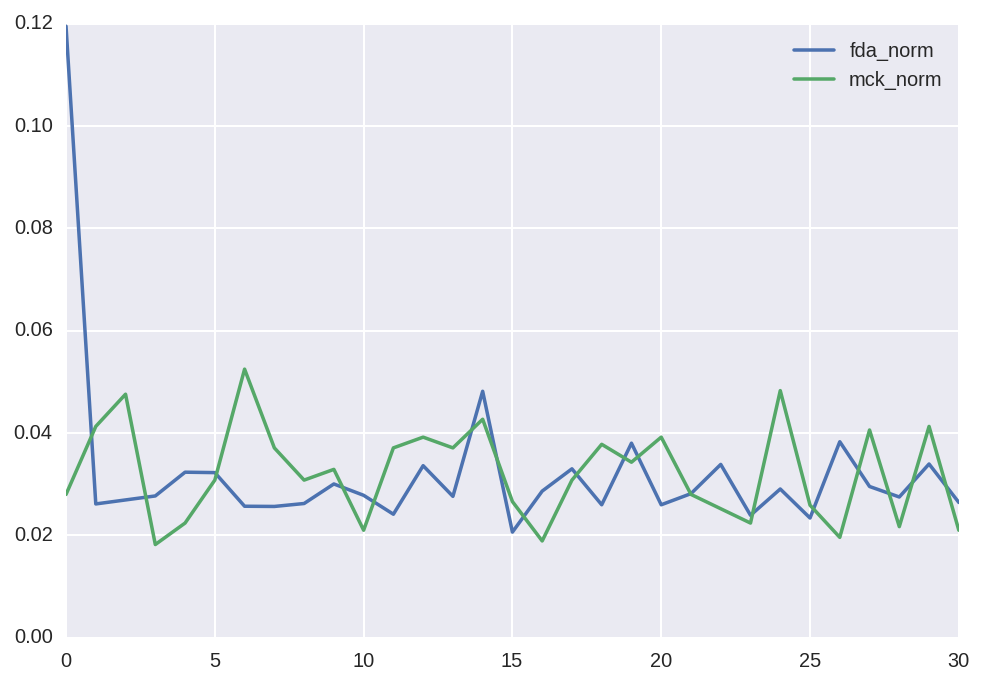

In [41]:
df_daymo = pd.read_csv('2006toCurr_GroupByDayInMonth.csv', sep = ',')

df_daymo['fda_norm'] = df_daymo['fdacnt'] / df_daymo['fdacnt'].sum()
df_daymo['mck_norm'] = df_daymo['mckcnt'] / df_daymo['mckcnt'].sum()
df_daymo[['fda_norm','mck_norm']].plot()